# **IBM RXN on Jupyter notebook**

注意，本模板适合纯有机合成人员，（简洁版），
如果你从事分子模拟或者药物设计等工作，请参考源码https://github.com/rxn4chemistry/rxn4chemistry ，未删减版，可直接把分子对接结果文件内置于此，进行关联逆合成分析。

你可以用它来做三件事。
**一**. 正向预测产物
**二.** 从文献提炼出最精炼的操作顺序和试剂当量
**三.** 逆合成分析

**运行环境安装**  python 3.6, Rdkit

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-06-07 00:45:54--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   275MB/s    in 0.3s    

2022-06-07 00:45:55 (275 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

**导入所需框架**

In [ ]:
import sys
import time
from collections import defaultdict

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
import pandas as pd
IPythonConsole.ipython_3d=True
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**请自行前往下面IBM的网站https://rxn.res.ibm.com/rxn/user/profile ，注册，然后再my account 中生成一串密钥，点击复制，然后粘贴到下面的代码行中**

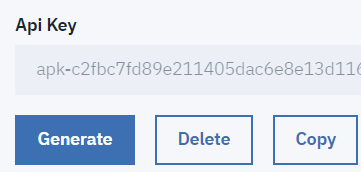

**正式安装IBM 组件 rxn4chemistry**

In [ ]:
! pip install rxn4chemistry
api_key='apk-29766f3ddd2aaa3ab80dc1632fe6bb0ae7f8dfba8d01db06ad67cecbe59228a96f9d987bf2334190452ba6da71c367b9a50b872abbb3d70c86e06cc07d50e226cb11c044efbf81c52b102a4c1bcb5a2f'
from rxn4chemistry import RXN4ChemistryWrapper
rxn4chemistry_wrapper = RXN4ChemistryWrapper(api_key=api_key)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 2.4 MB/s 
     |████████████████████████████████| 109 kB 8.7 MB/s 
  Created wheel for rxn4chemistry: filename=RXN4Chemistry-1.6.0-py3-none-any.whl size=15568 sha256=85c4f5479baa0dd642fbd0c69ef021473b4b543bf7ffc197ceed20afb5ed1618
  Stored in directory: /root/.cache/pip/wheels/09/92/fe/fe696a2500d7517670a5b1f3e2e2d2b70dcb6fe2bbe888e1bd
Successfully built rxn4chemistry
ERROR: conda 4.13.0 requires ruamel_yaml_conda>=0.11.14, which is not installed.
  Attempting uninstall: requests
    Found existing installation: requests 2.22.0
    Uninstalling requests-2.22.0:
      Successfully uninstalled requests-2.22.0


创建新项目

In [ ]:
rxn4chemistry_wrapper.create_project('2-pyridine-boronic aicd for srpk1 coupling')
print(rxn4chemistry_wrapper.project_id)

629ea09bc62e7a0001fa8fe4


如果要打开已经有的项目，请更换以上指令rxn4chemistry_wrapper.create_project('test_wrapper')为 rxn4chemistry_wrapper.

---

set_project('PROJECT_ID')

***一.正向合成预测*** 请自行从chemdraw 拷贝两个反应起始物的SMILES (Edit > copy as >SMILES)

In [ ]:
response = rxn4chemistry_wrapper.predict_reaction(
    'BrBr.c1ccc2cc3ccccc3cc2c1'
)


In [ ]:
results = rxn4chemistry_wrapper.get_predict_reaction_results(
    response['prediction_id']
)


In [ ]:
print(results['response']['payload']['attempts'][0]['smiles'])

BrBr.c1ccc2cc3ccccc3cc2c1>>Brc1c2ccccc2cc2ccccc12


因为正向预测不是很常用，就不附图形展示了，你可以自行拷贝SMILES 到Chemdraw, Edit > paste special > SMILES 去看

**二，提取精炼的文献操作顺序和当量.** 从文献中粘贴反应步段落，粘贴到下面代码格子，替换红色部分内容

In [ ]:
results = rxn4chemistry_wrapper.paragraph_to_actions(
    'To a stirred solution of '
    '7-(difluoromethylsulfonyl)-4-fluoro-indan-1-one (110 mg, '
    '0.42 mmol) in methanol (4 mL) was added sodium borohydride '
    '(24 mg, 0.62 mmol). The reaction mixture was stirred at '
    'ambient temperature for 1 hour.'
)
print(results['actions'])

['MAKESOLUTION with 7-(difluoromethylsulfonyl)-4-fluoro-indan-1-one (110 mg, 0.42 mmol) and methanol (4 mL)', 'ADD SLN', 'ADD sodium borohydride (24 mg, 0.62 mmol)', 'STIR for 1 hour at ambient temperature']


**三. 逆合成分析**
请自行生成SMILES并替换到下面的代码行


In [ ]:
response = rxn4chemistry_wrapper.predict_automatic_retrosynthesis(
    'O=C1C(C2=NC=C(C3=CNN=C3)C=C2)=CN(C4=C1C=C(Br)C=C4)C'
)

In [ ]:
results = rxn4chemistry_wrapper.get_predict_automatic_retrosynthesis_results(
    response['prediction_id']
)

In [ ]:
# rerun this until the status is 'SUCCESS', keep in mind the server allows only 5 requests per minute
# and a timeout between consecutive requests of 2 seconds
#If it times out, wait a couple of minutes and rerun.

import time

while True:
    results = rxn4chemistry_wrapper.get_predict_automatic_retrosynthesis_results(response['prediction_id'])
    if results['status'] == 'SUCCESS':
        break
    time.sleep(30) #check every 30 secs

In [ ]:
print(results['status'])

SUCCESS


In [ ]:
print(results['retrosynthetic_paths'][0])

{'id': '629ea111c62e7a0001fa9010', 'metadata': {}, 'embed': {}, 'computedFields': {}, 'createdOn': 1654563089028, 'createdBy': 'system', 'modifiedOn': 1654563089028, 'modifiedBy': 'system', 'moleculeId': '629ea110c62e7a0001fa9002', 'retrosynthesisId': '629ea0f4c62e7a0001fa8ff5', 'sequenceId': '629ea110c62e7a0001fa9001', 'projectId': '629ea09bc62e7a0001fa8fe4', 'smiles': 'O=C1C(C2=NC=C(C3=CNN=C3)C=C2)=CN(C4=C1C=C(Br)C=C4)C', 'confidence': 0.91, 'confidenceTag': None, 'rclass': 'Bromo Suzuki coupling', 'hasFeedback': False, 'feedback': None, 'children': [{'id': '629ea110c62e7a0001fa900a', 'metadata': {}, 'embed': {}, 'computedFields': {}, 'createdOn': 1654563088964, 'createdBy': 'system', 'modifiedOn': 1654563088964, 'modifiedBy': 'system', 'moleculeId': '629ea110c62e7a0001fa9003', 'retrosynthesisId': '629ea0f4c62e7a0001fa8ff5', 'sequenceId': '629ea110c62e7a0001fa9001', 'projectId': '629ea09bc62e7a0001fa8fe4', 'smiles': 'Cn1cc(-c2ccc(Br)cn2)c(=O)c2cc(Br)ccc21', 'confidence': 0.998, 'conf

In [ ]:
def collect_reactions(tree):
    reactions = []
    if 'children' in tree and len(tree['children']):
        reactions.append(
            AllChem.ReactionFromSmarts('{}>>{}'.format(
                '.'.join([node['smiles'] for node in tree['children']]),
                tree['smiles']
            ), useSmiles=True)
        )
    for node in tree['children']:
        reactions.extend(collect_reactions(node))
    return reactions


合成路线图片显示

Showing path 0 with confidence 0.91:


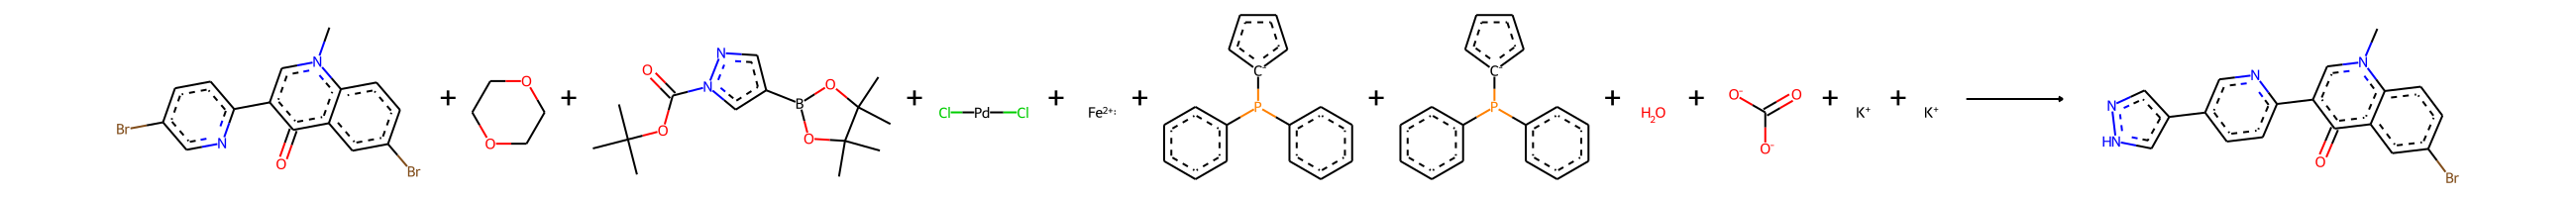

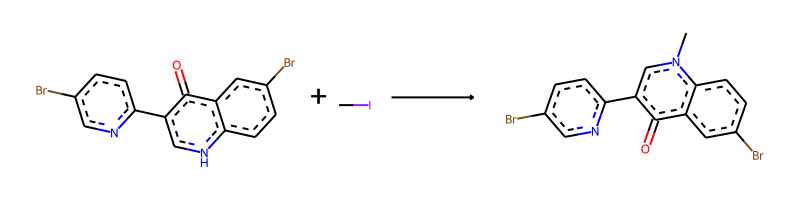

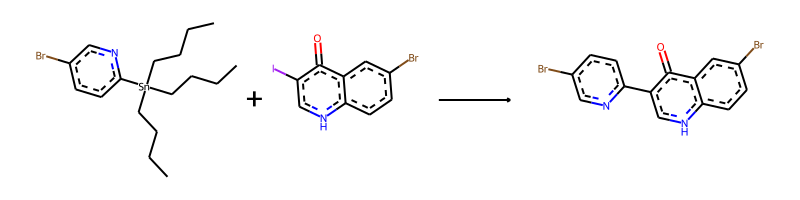

Showing path 1 with confidence 0.999:


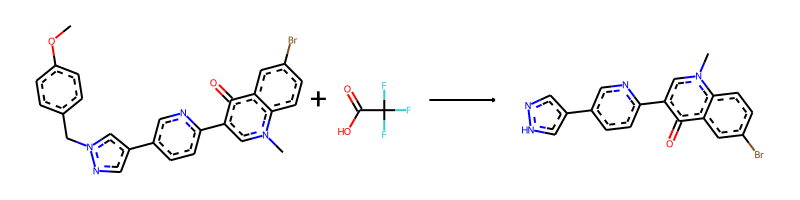

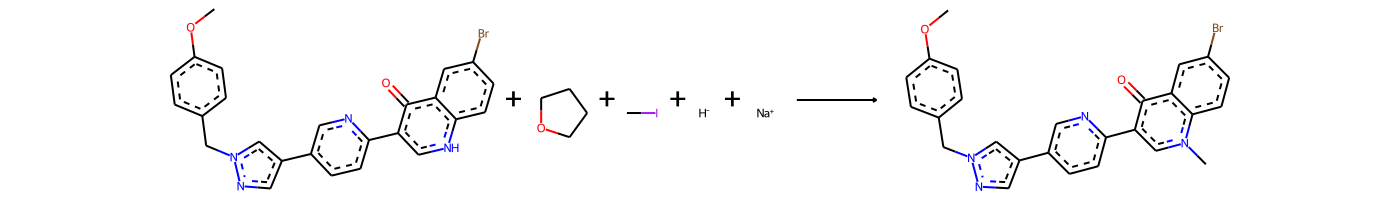

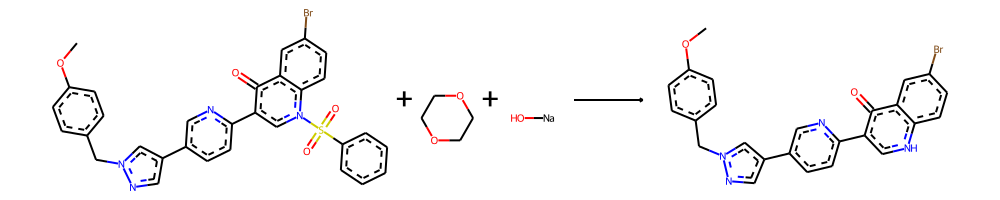

Showing path 2 with confidence 0.999:


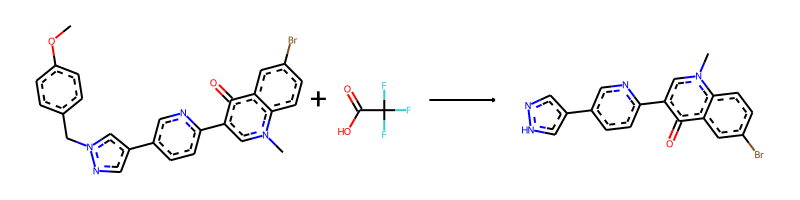

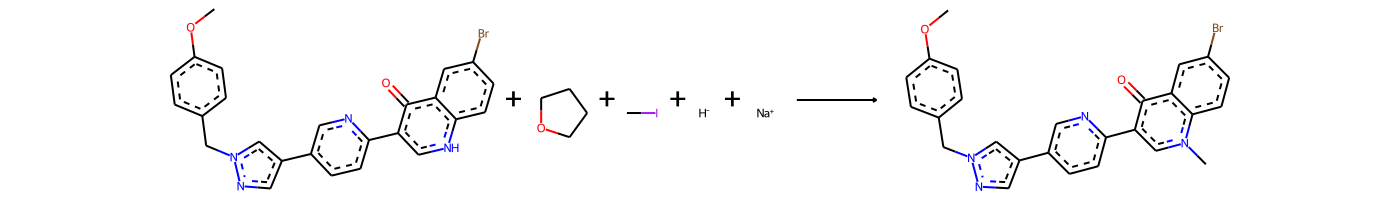

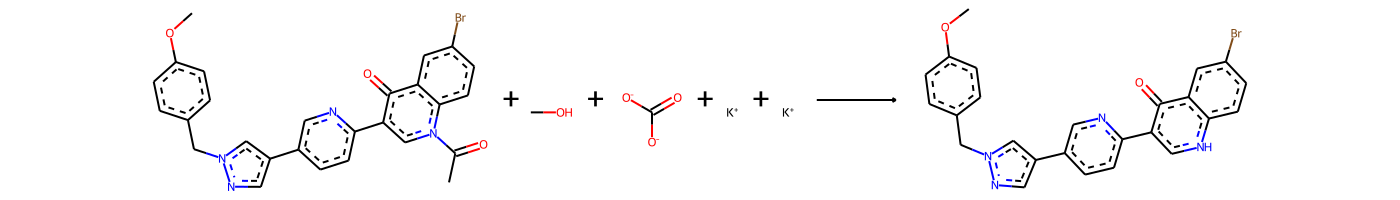

Showing path 3 with confidence 0.999:


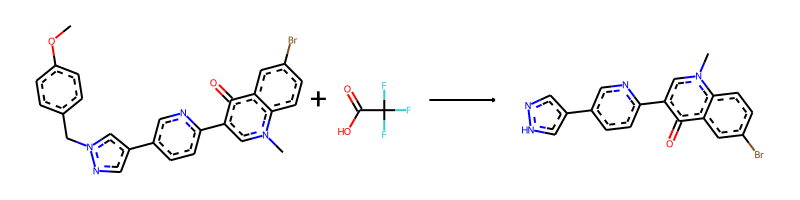

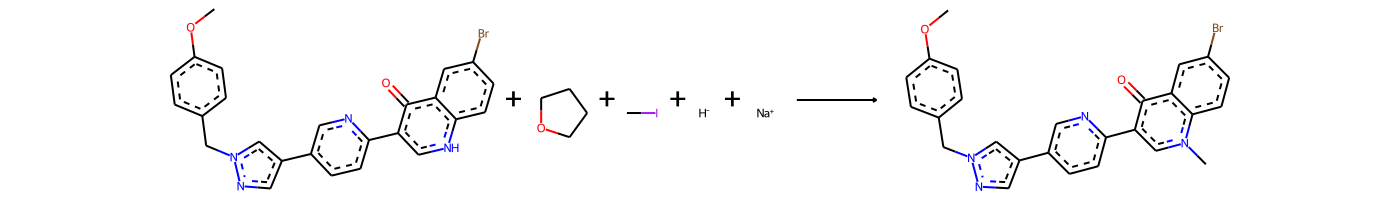

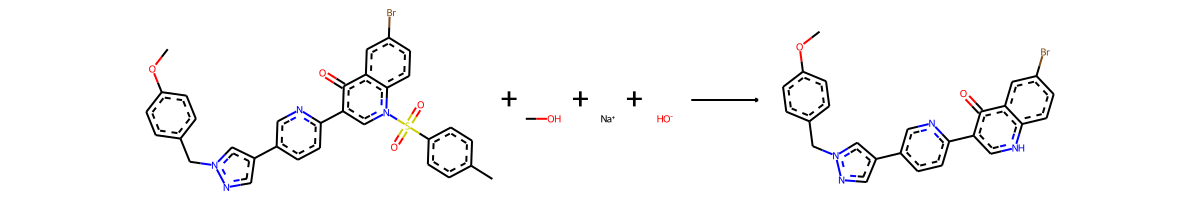

Showing path 4 with confidence 0.999:


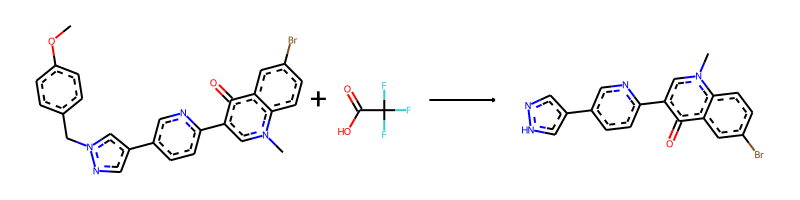

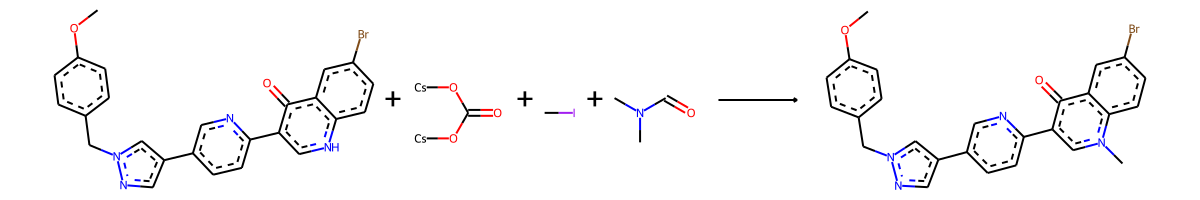

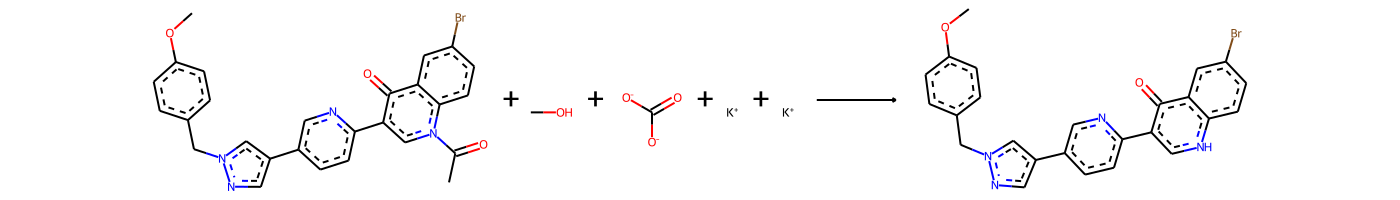

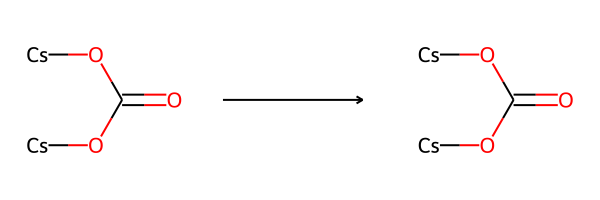

Showing path 5 with confidence 0.999:


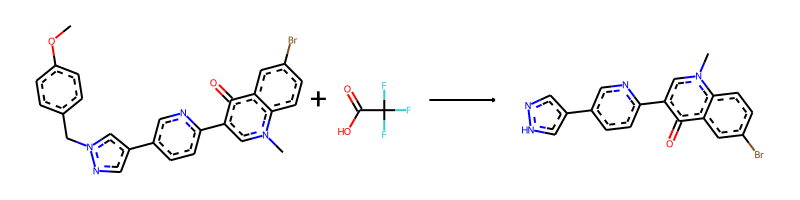

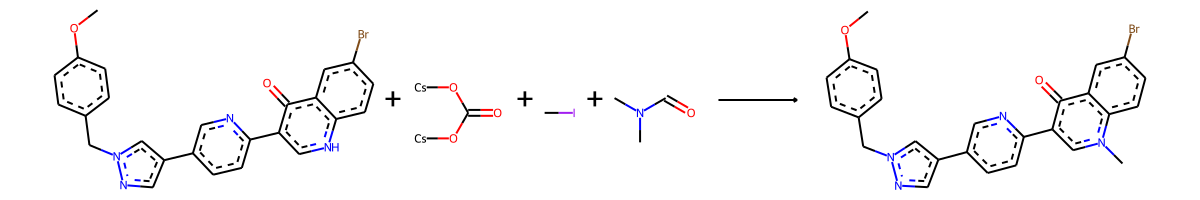

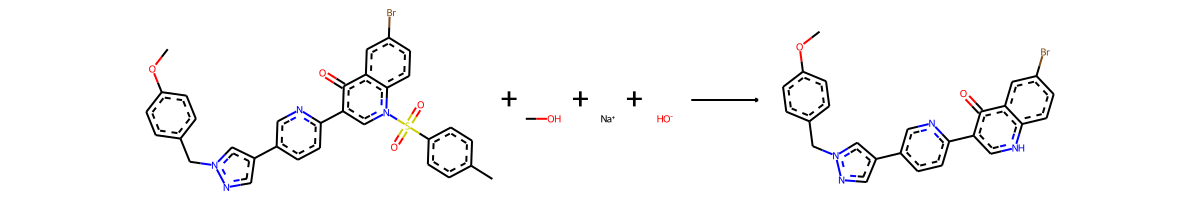

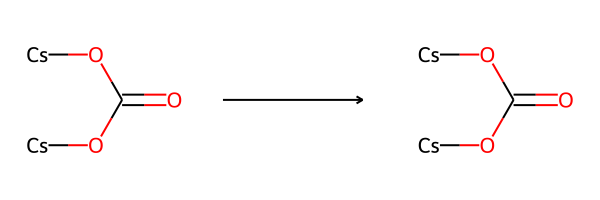

Showing path 6 with confidence 1.0:


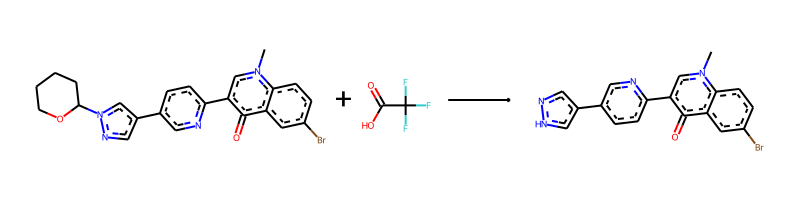

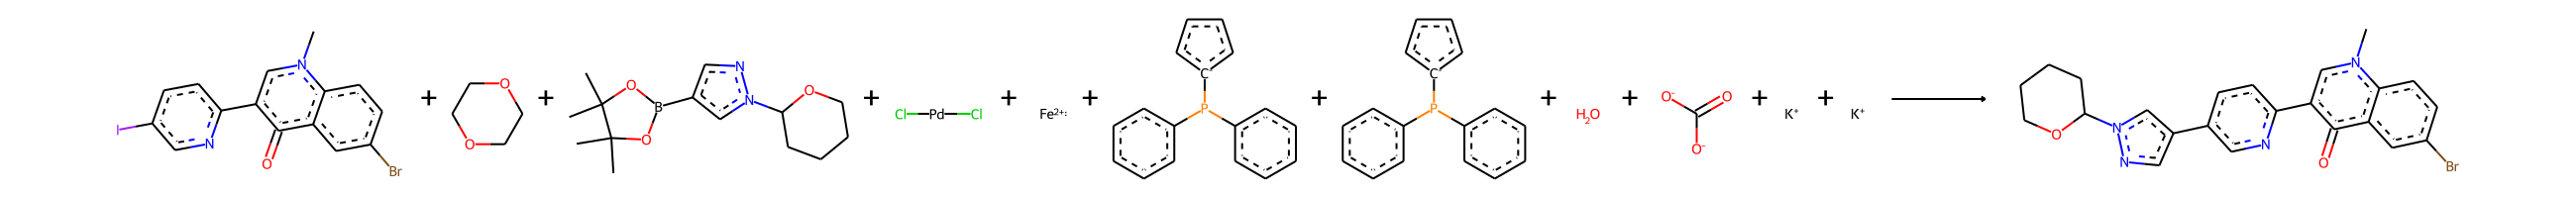

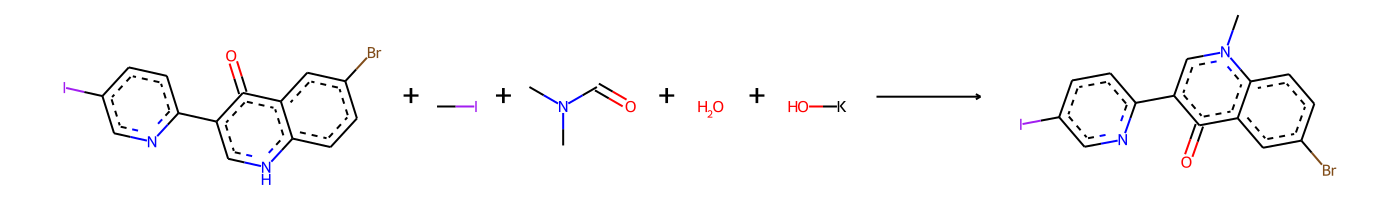

Showing path 7 with confidence 0.999:


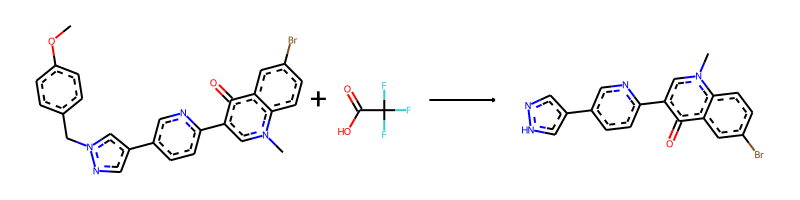

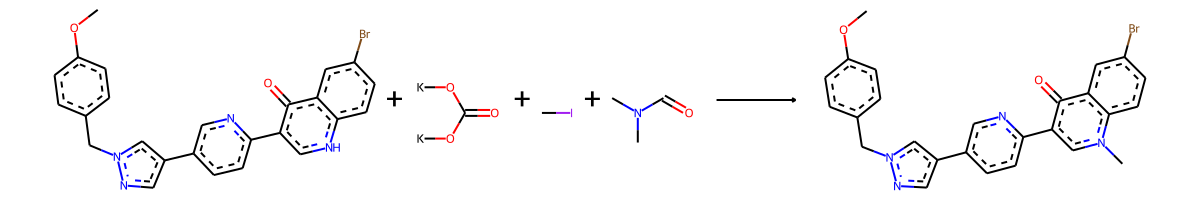

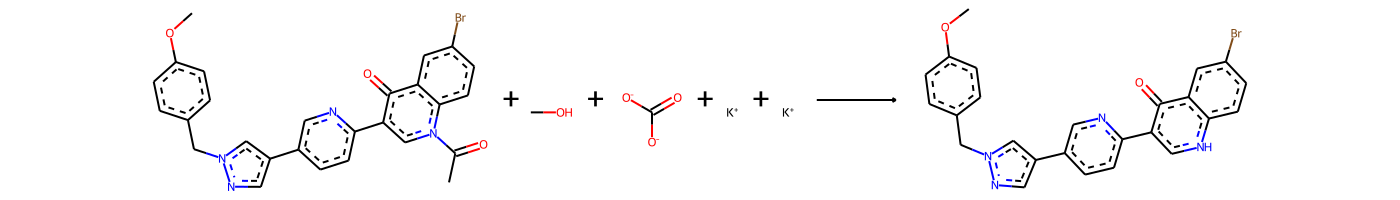

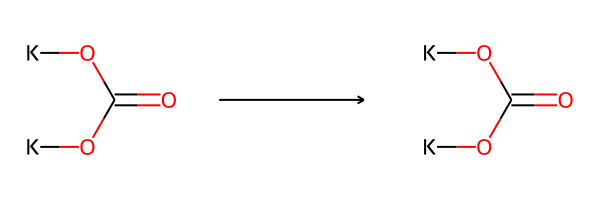

Showing path 8 with confidence 0.999:


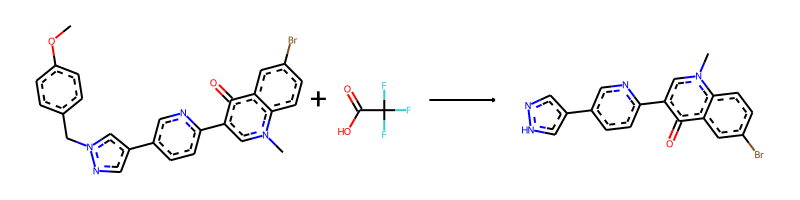

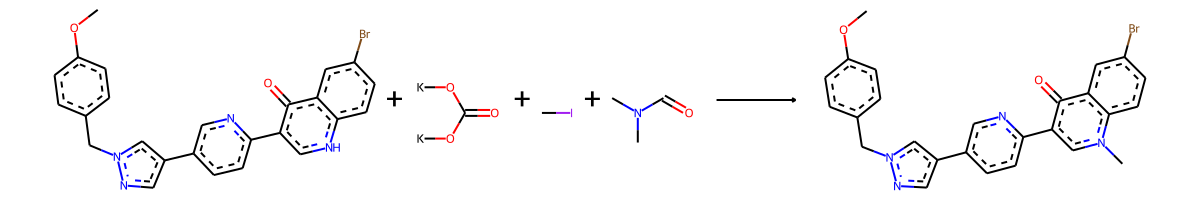

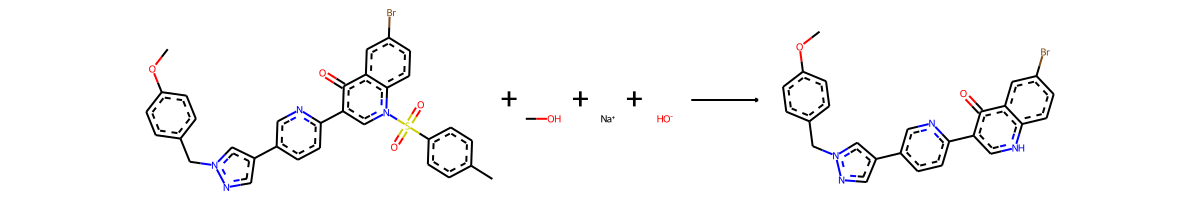

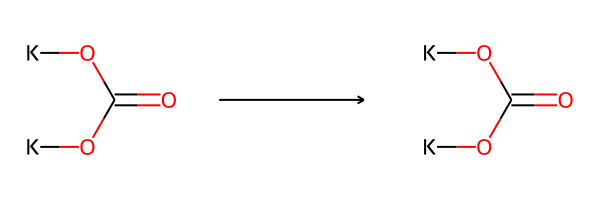

Showing path 9 with confidence 1.0:


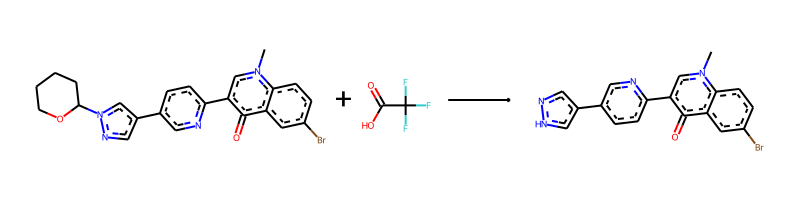

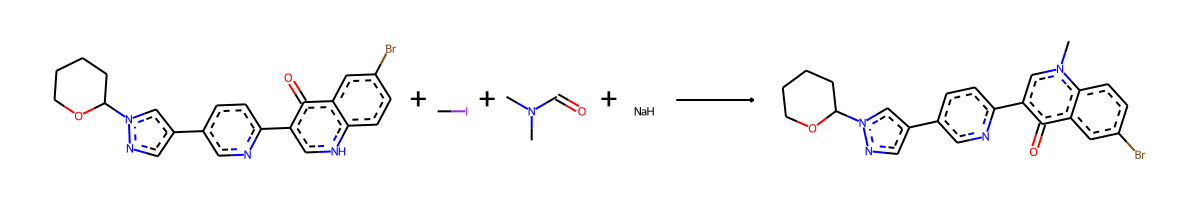

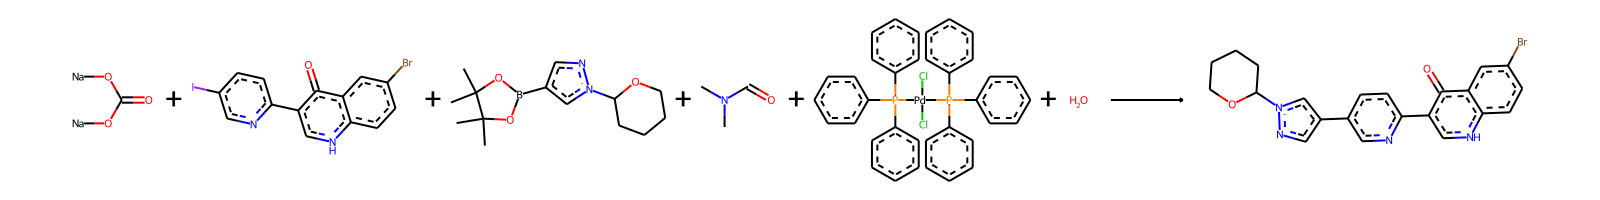

Showing path 10 with confidence 1.0:


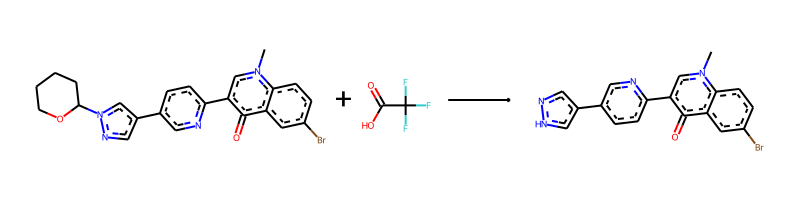

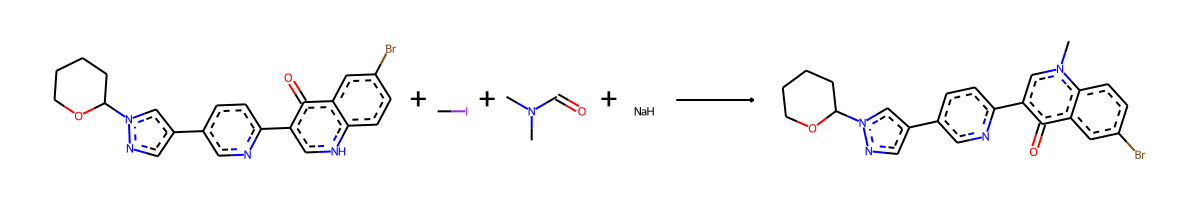

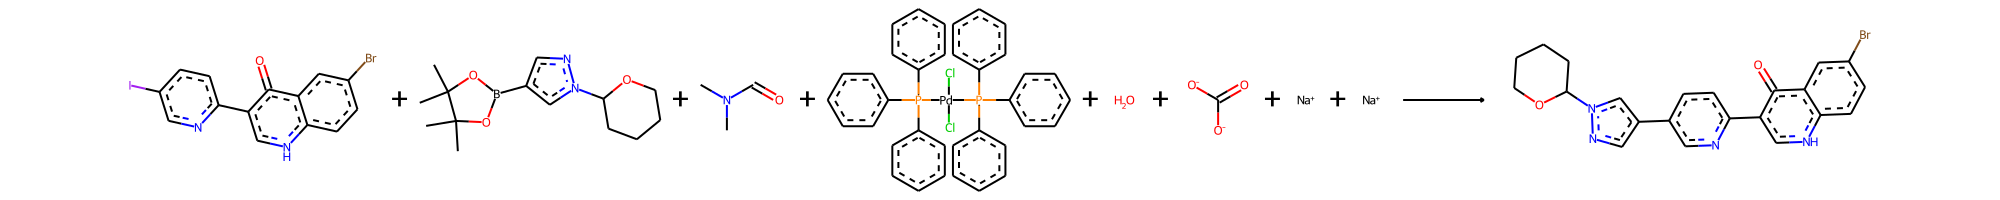

Showing path 11 with confidence 1.0:


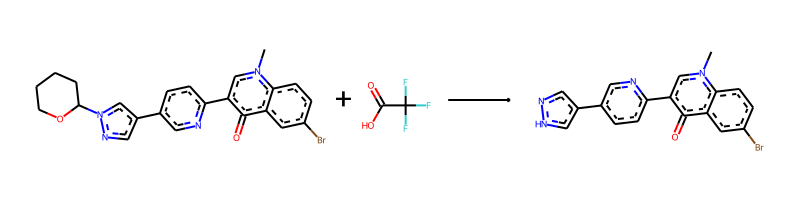

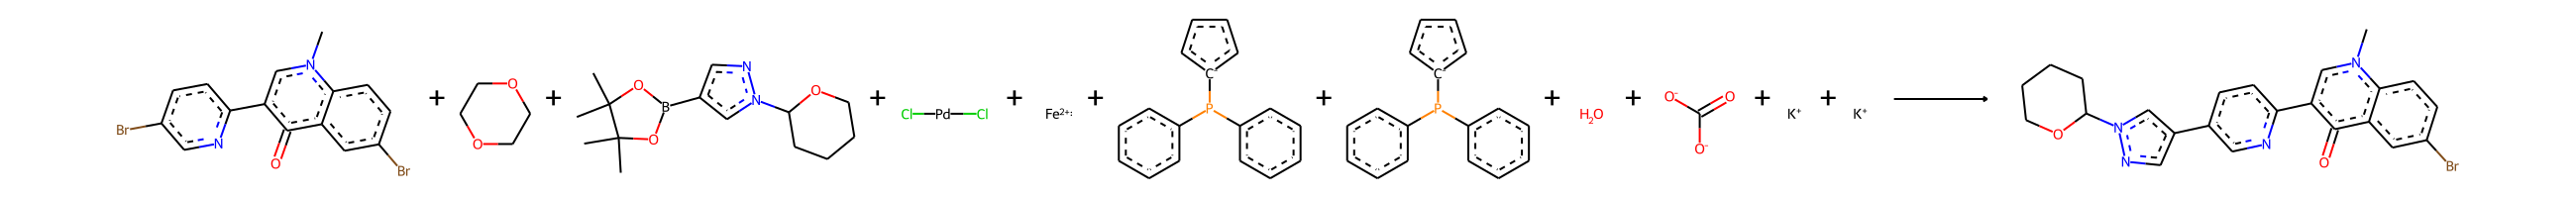

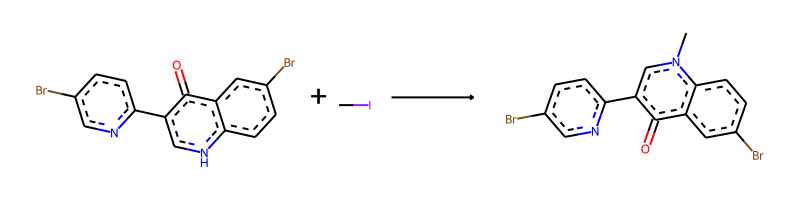

Showing path 12 with confidence 1.0:


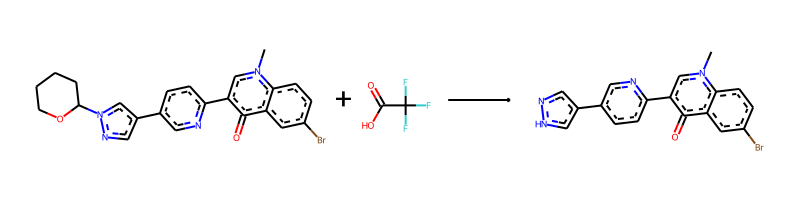

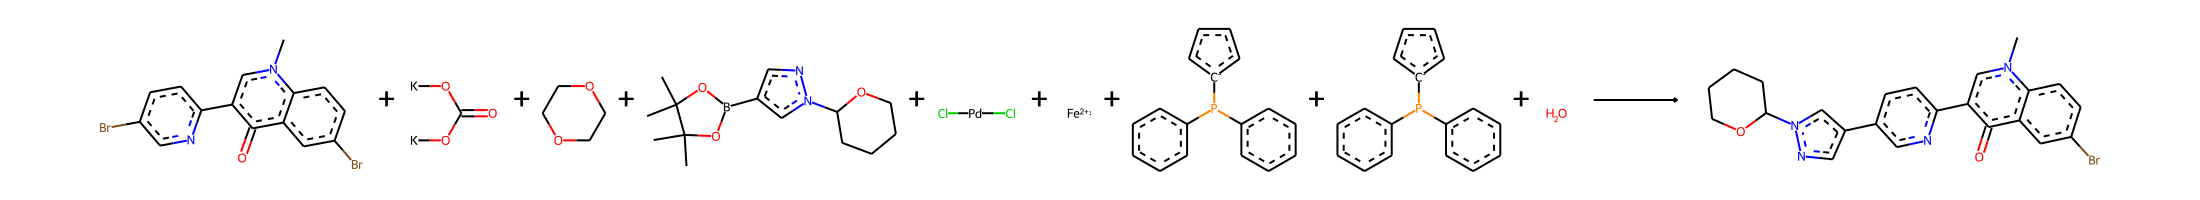

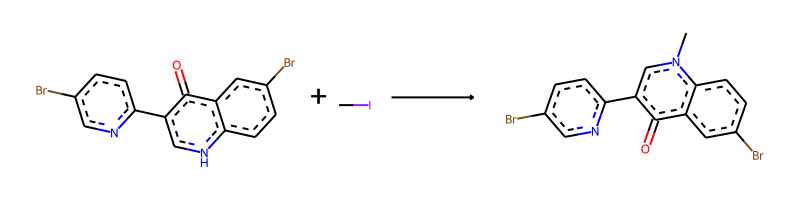

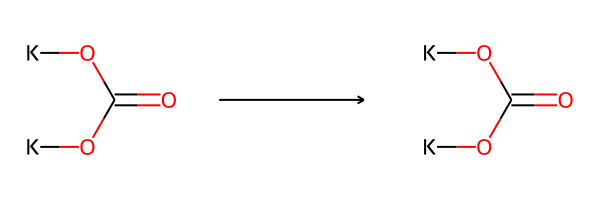

Showing path 13 with confidence 1.0:


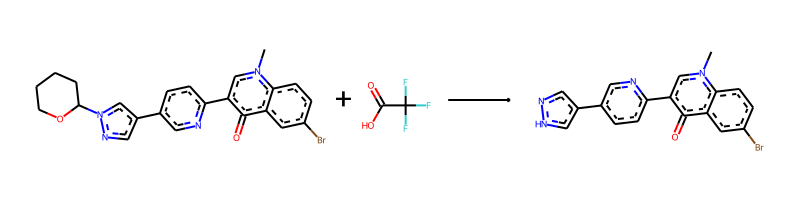

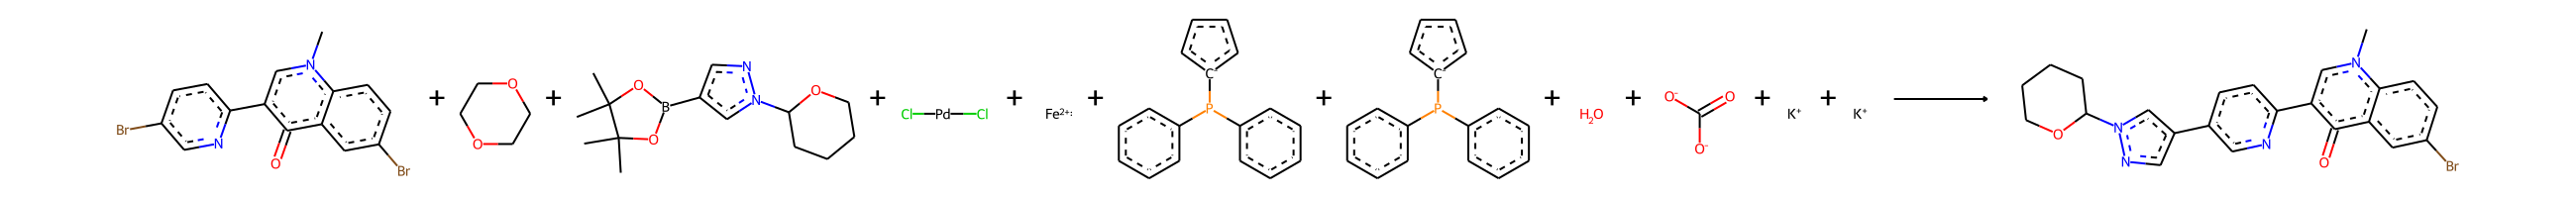

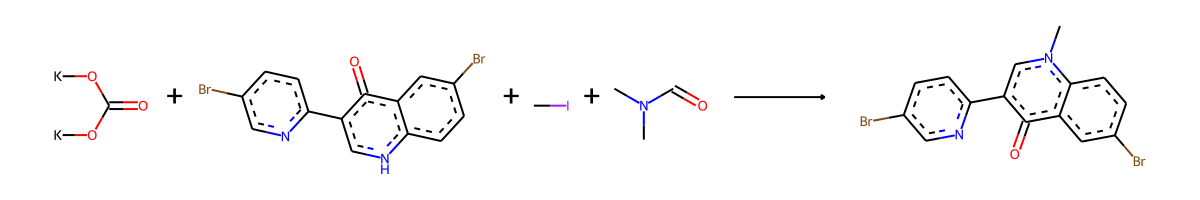

Showing path 14 with confidence 1.0:


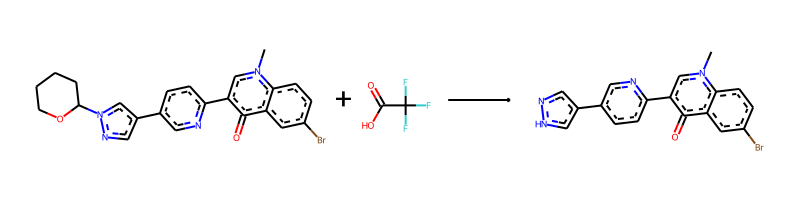

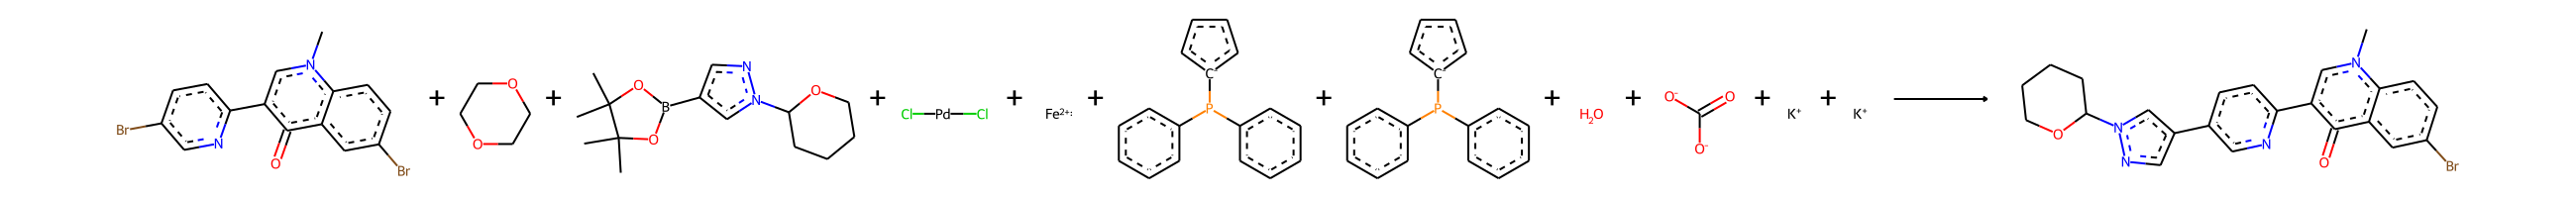

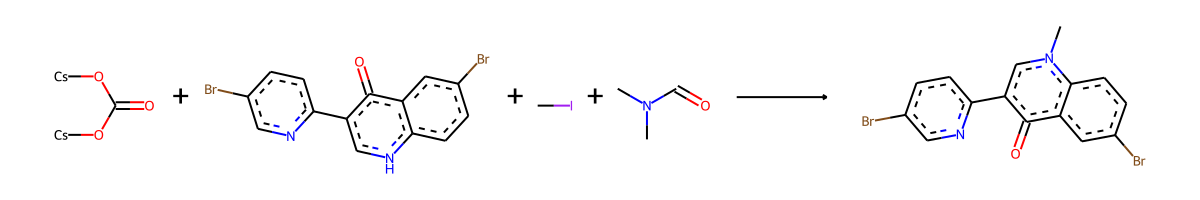

Showing path 15 with confidence 1.0:


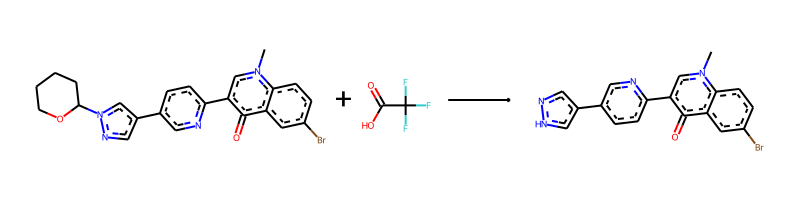

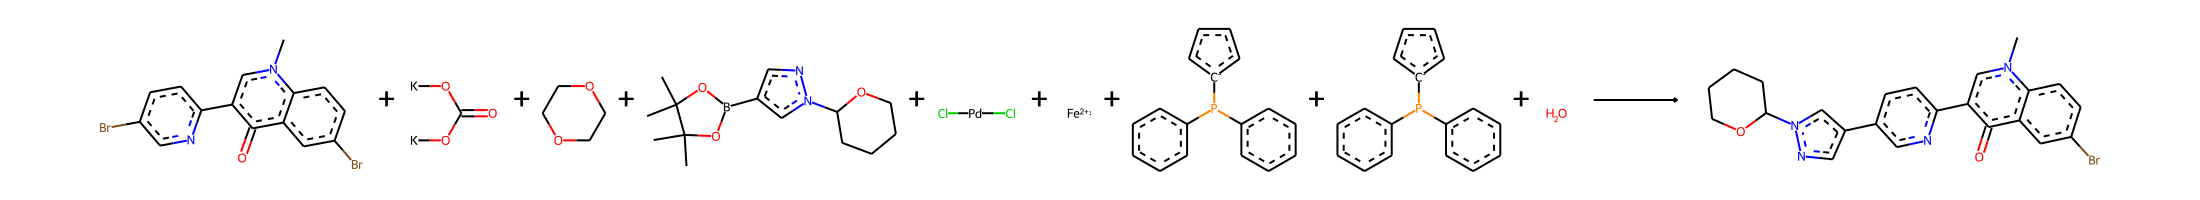

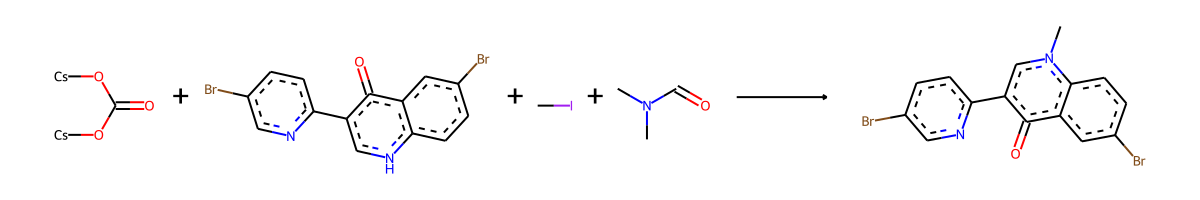

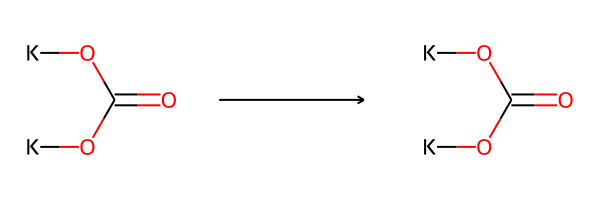

Showing path 16 with confidence 0.999:


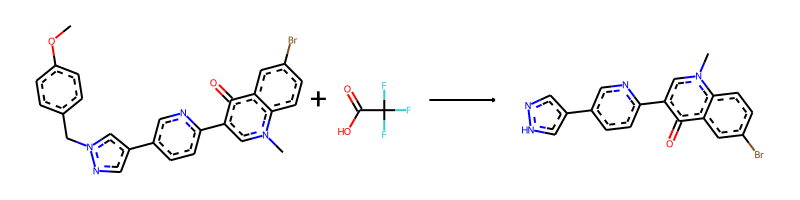

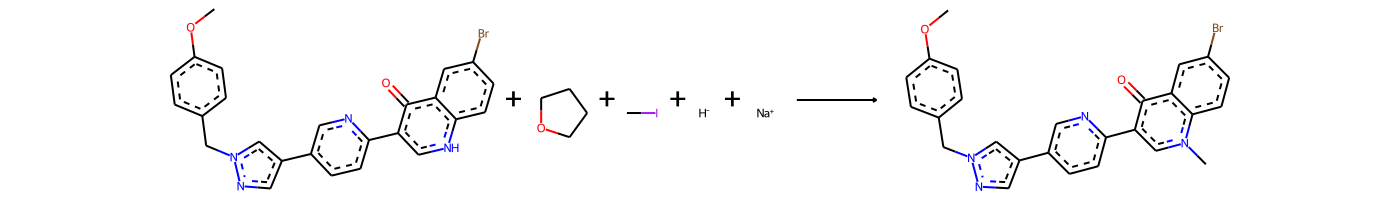

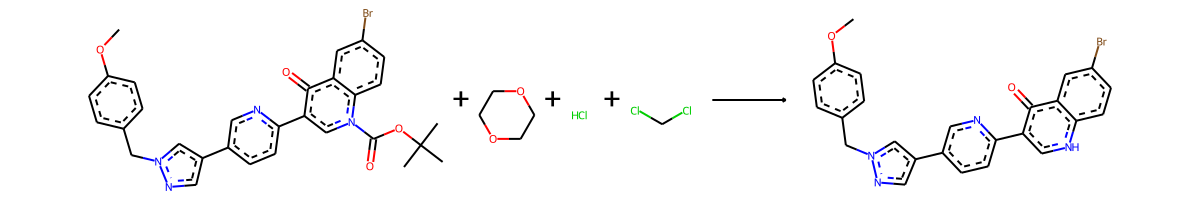

Showing path 17 with confidence 0.999:


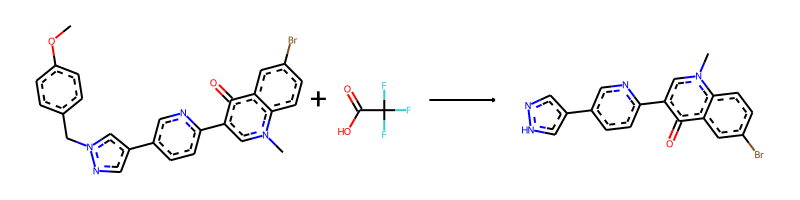

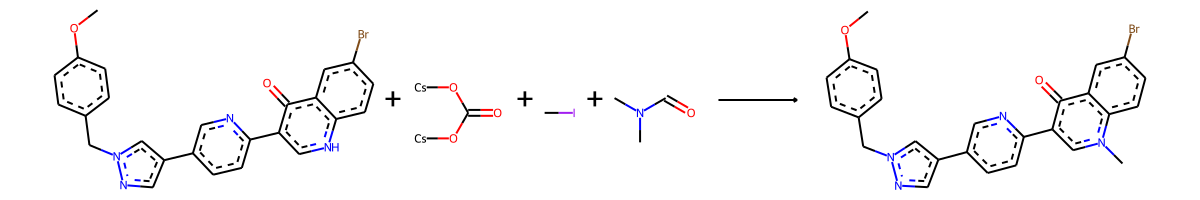

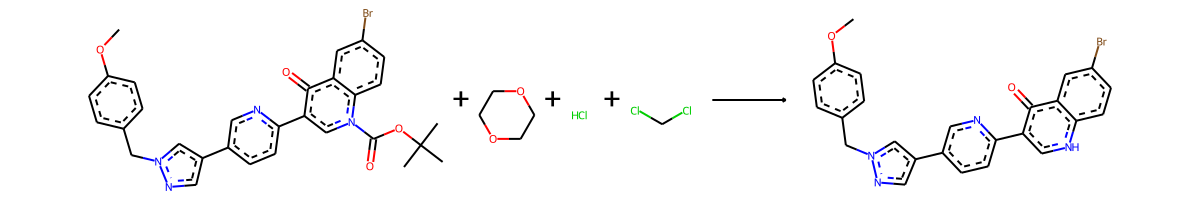

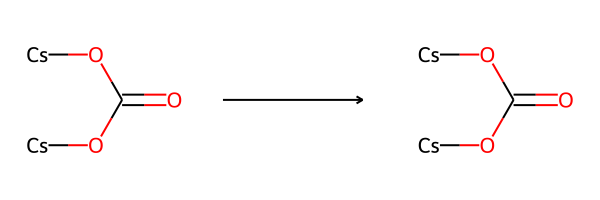

Showing path 18 with confidence 1.0:


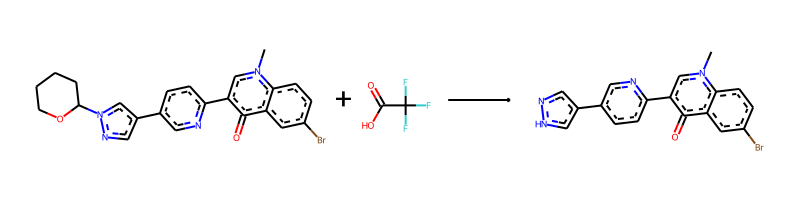

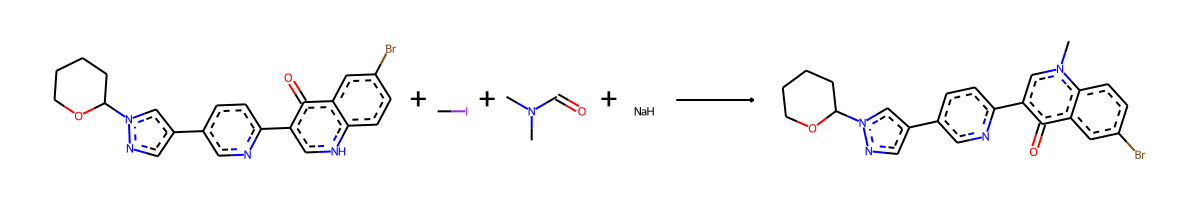

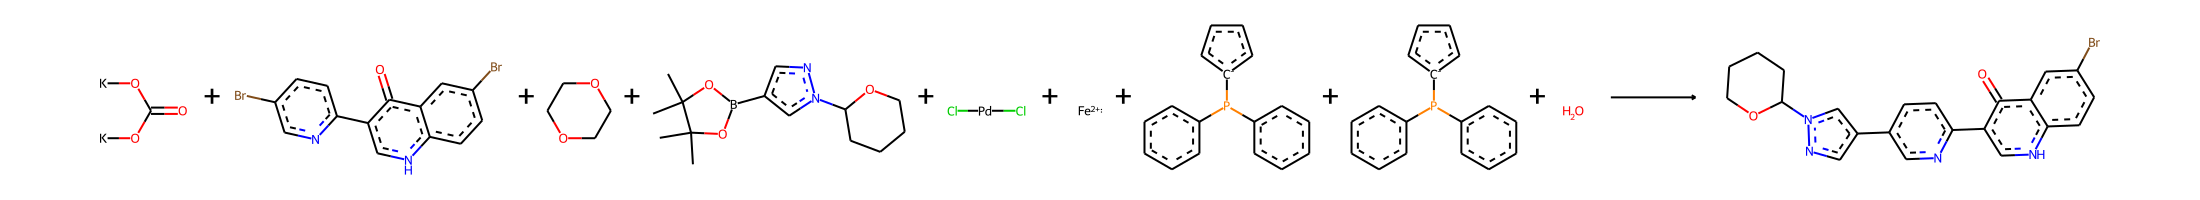

Showing path 19 with confidence 0.999:


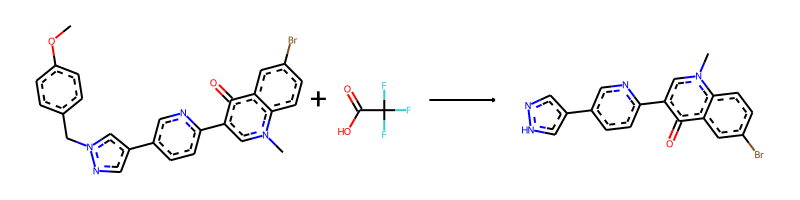

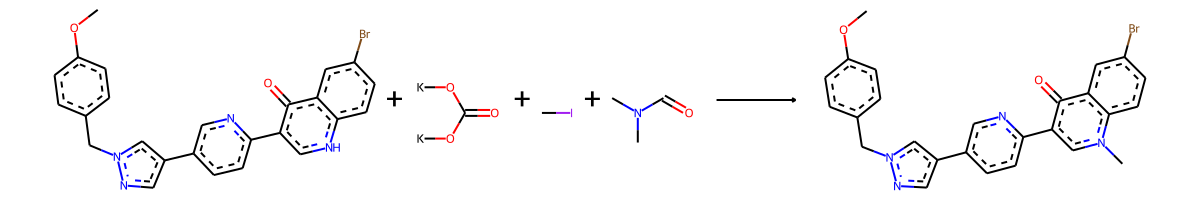

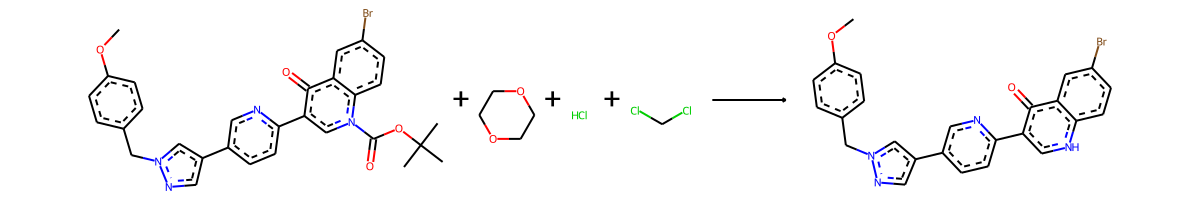

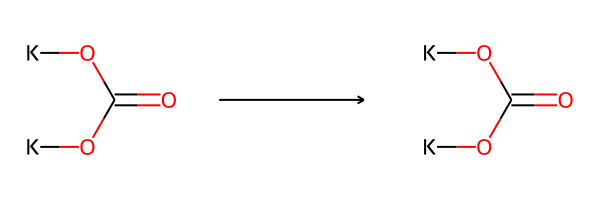

Showing path 20 with confidence 1.0:


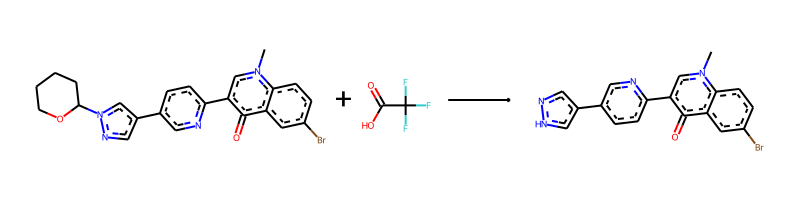

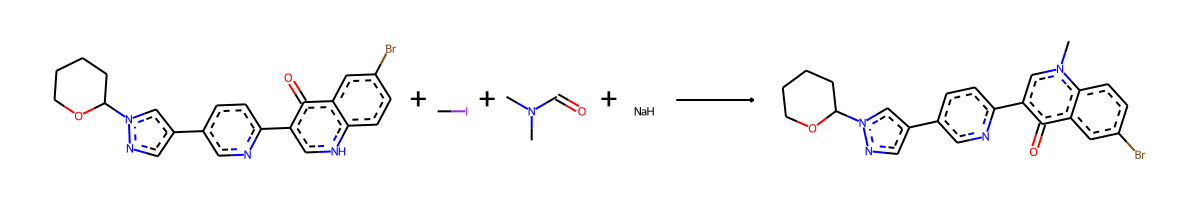

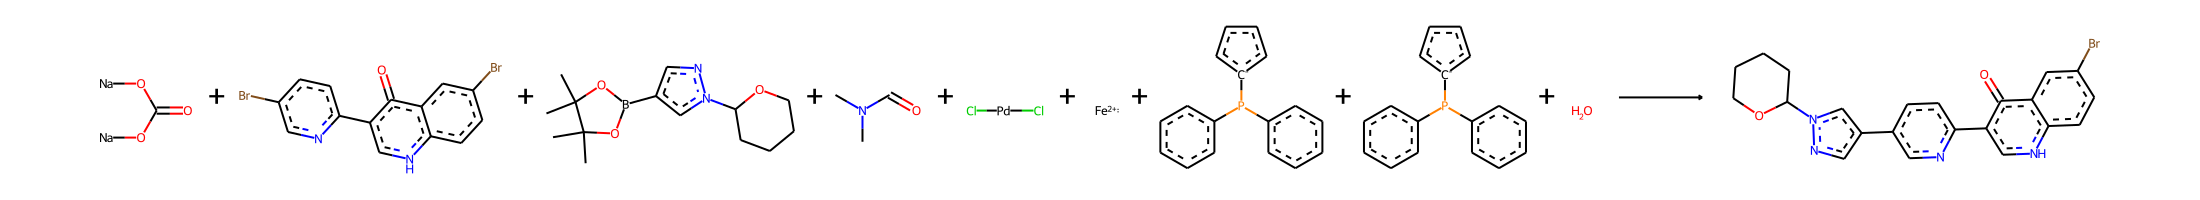

Showing path 21 with confidence 1.0:


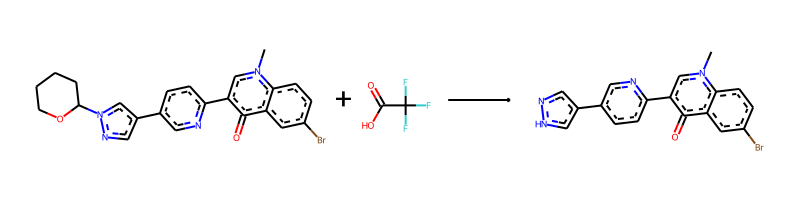

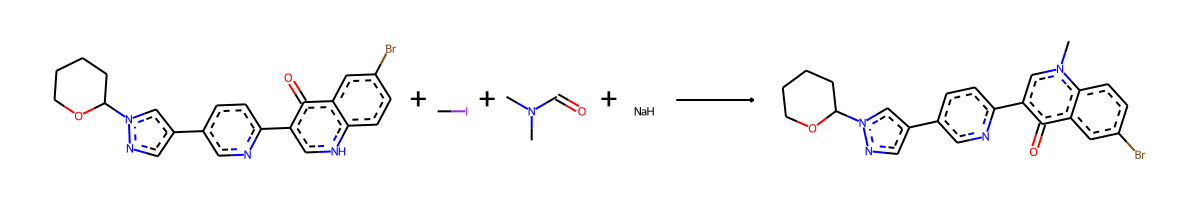

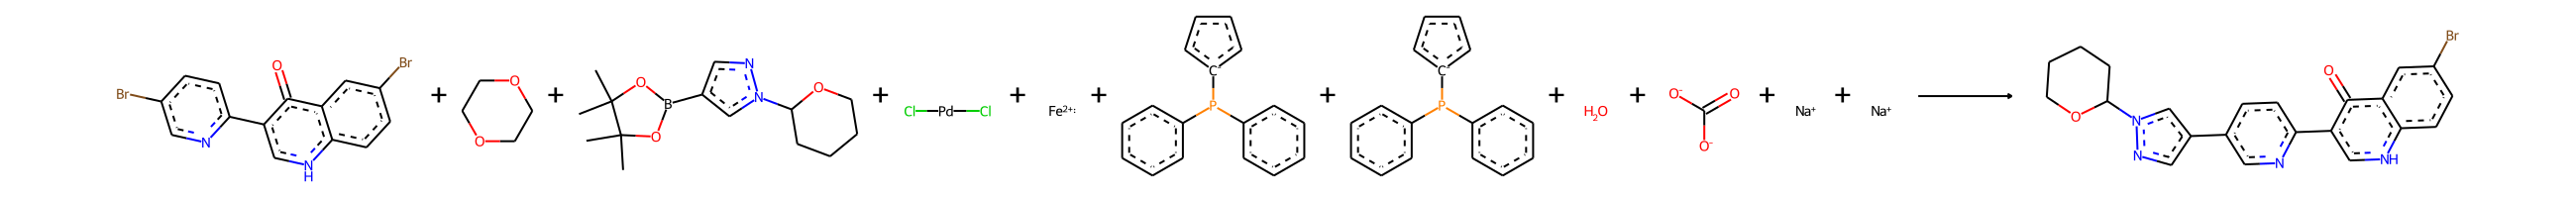

Showing path 22 with confidence 0.91:


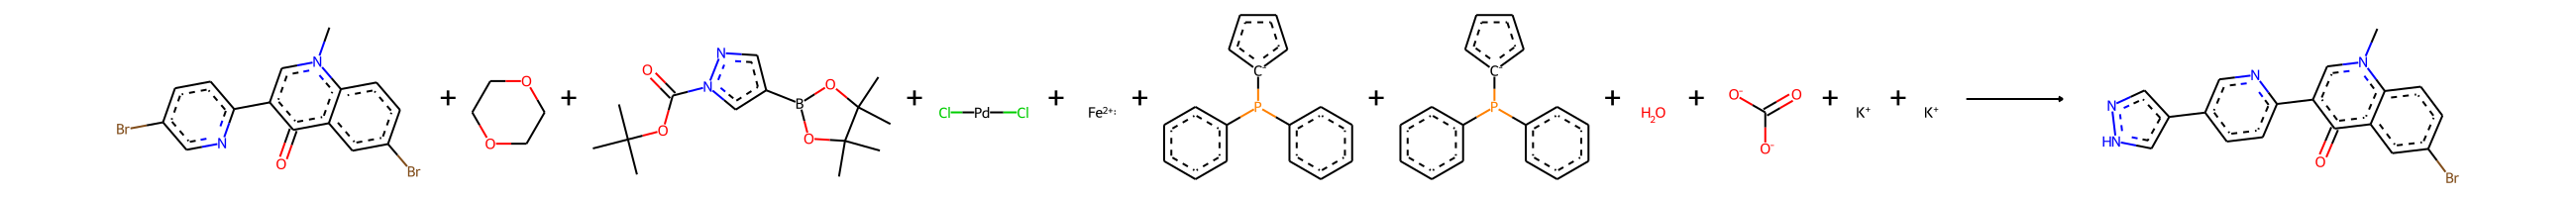

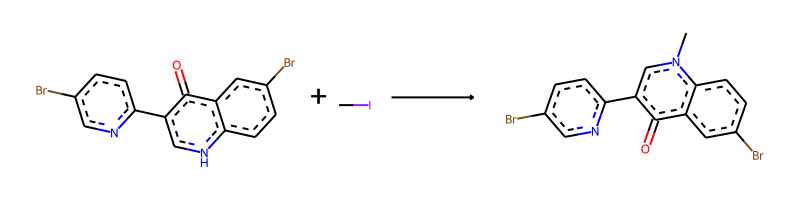

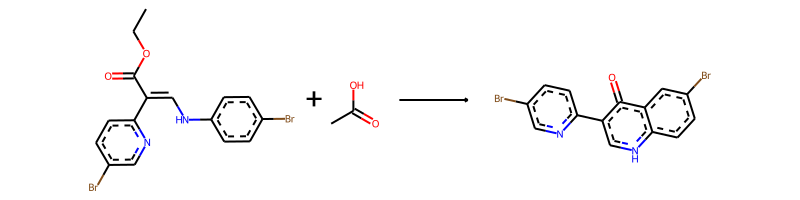

Showing path 23 with confidence 0.91:


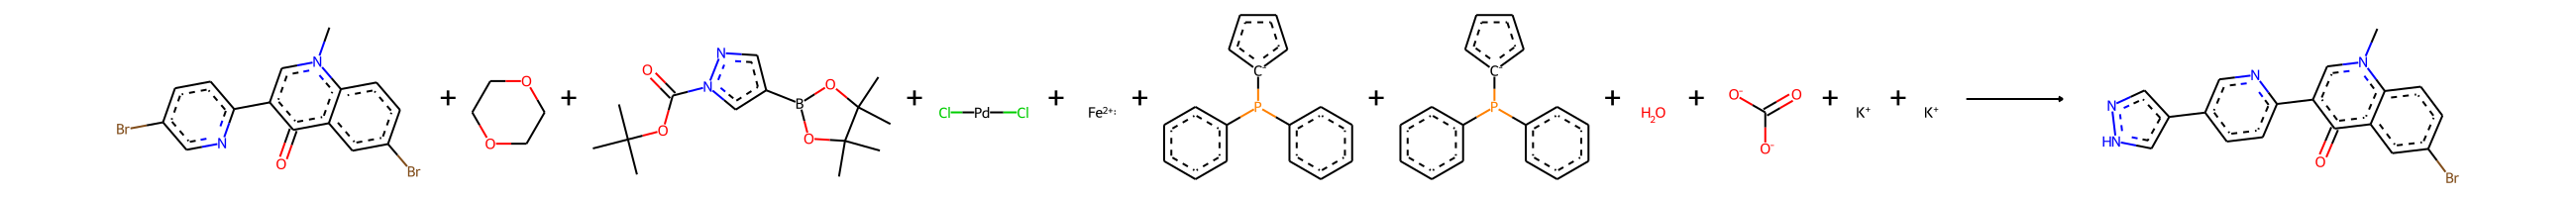

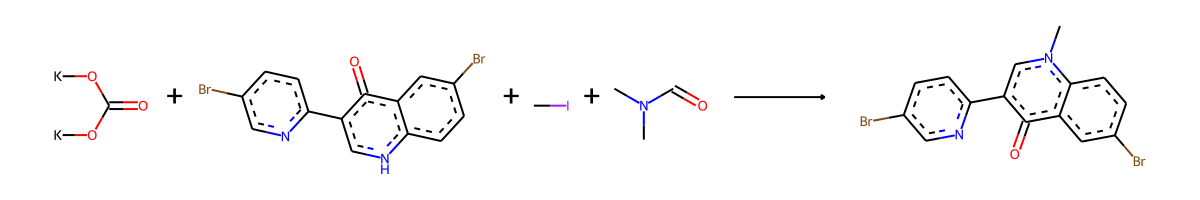

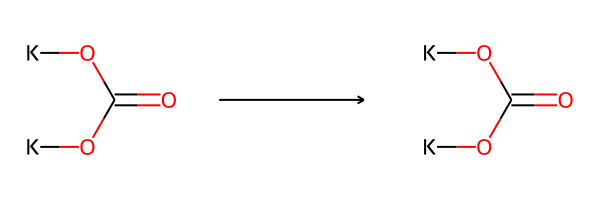

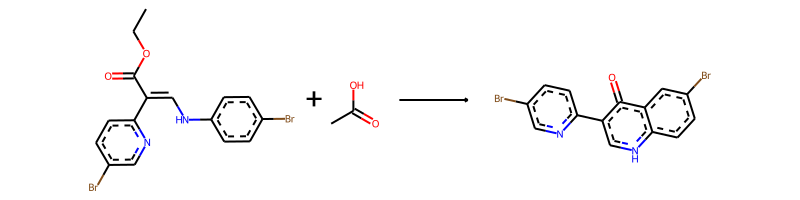

Showing path 24 with confidence 0.91:


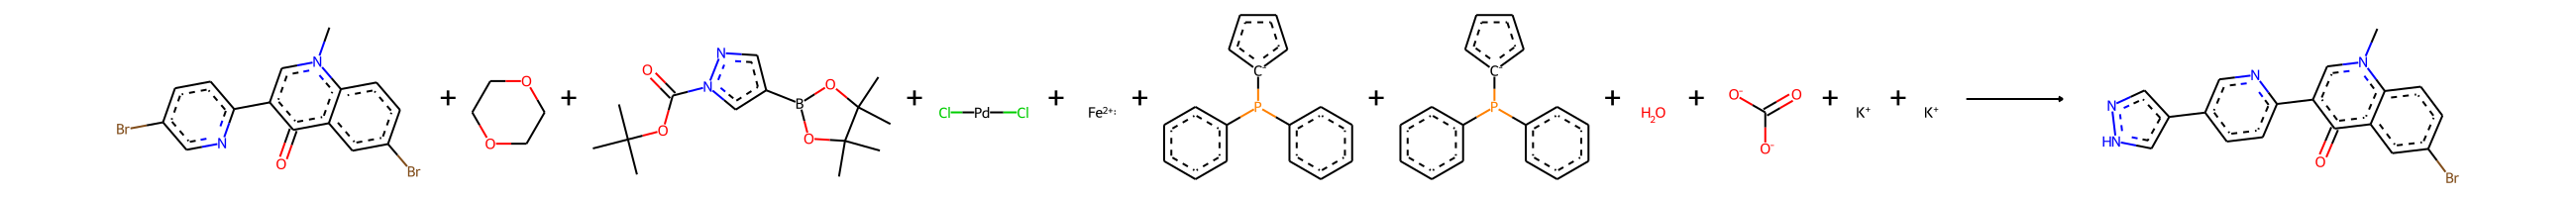

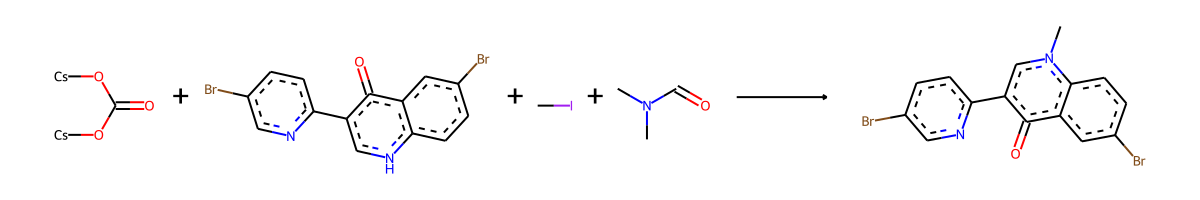

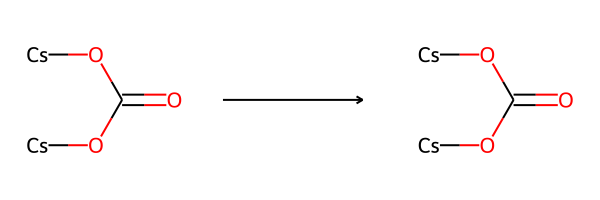

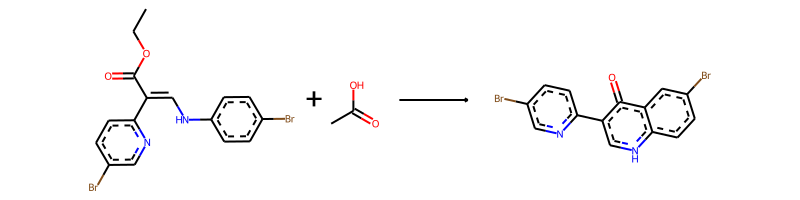

Showing path 25 with confidence 0.822:


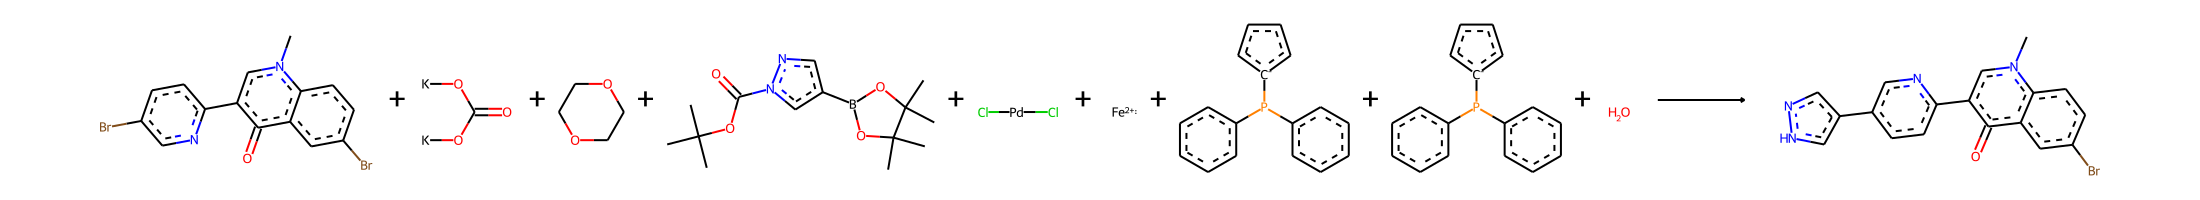

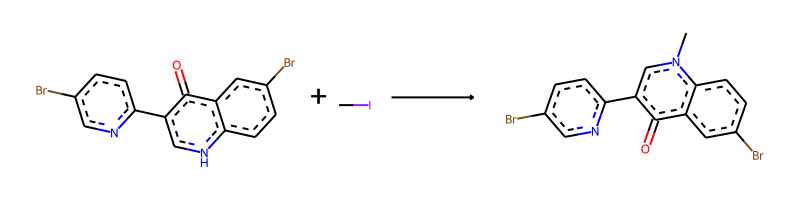

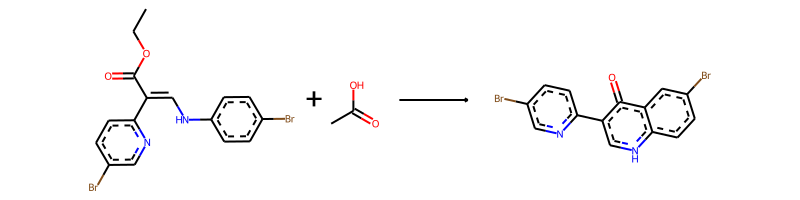

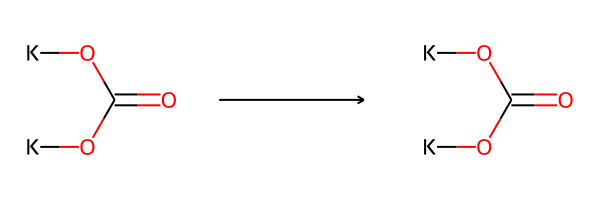

Showing path 26 with confidence 0.822:


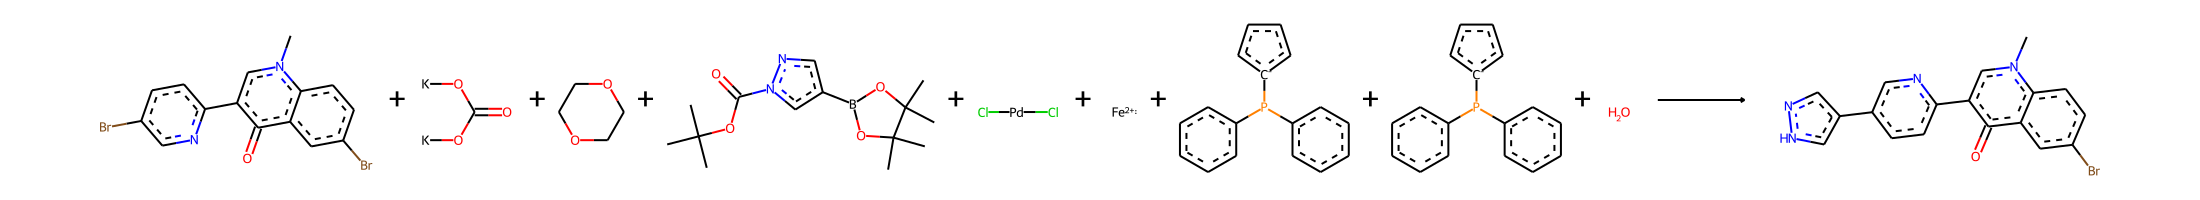

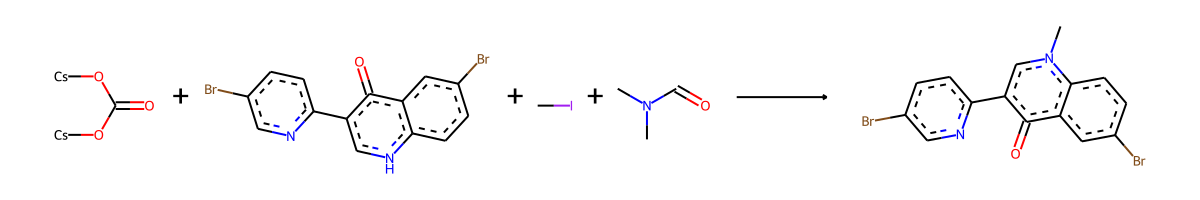

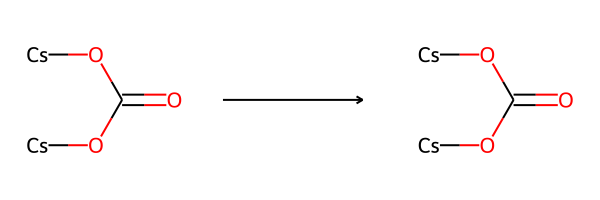

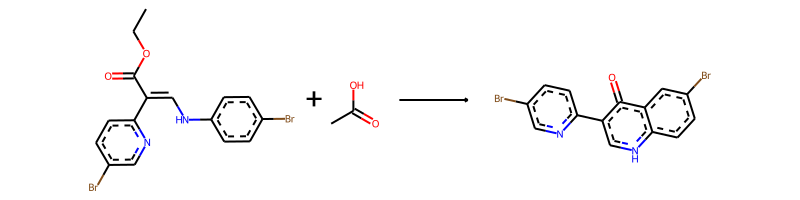

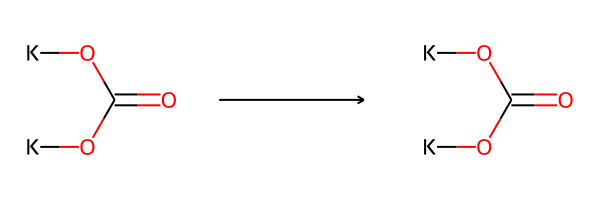

Showing path 27 with confidence 0.822:


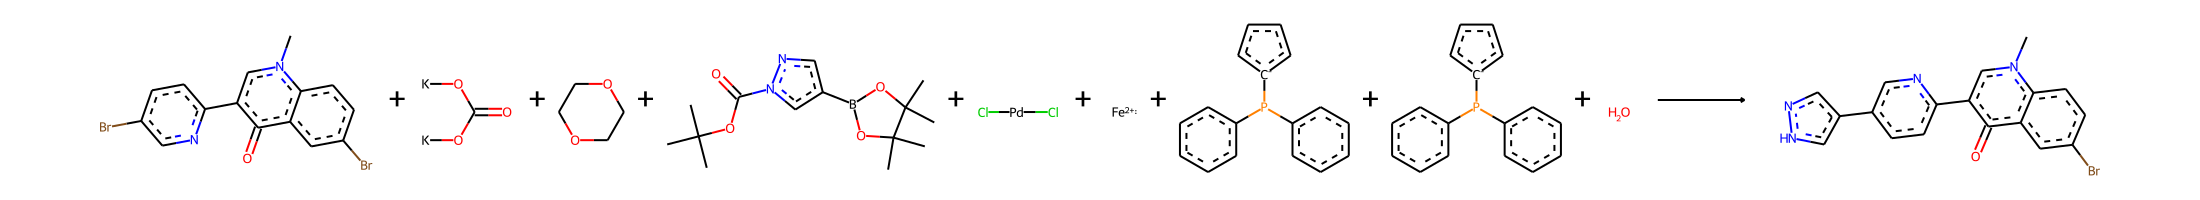

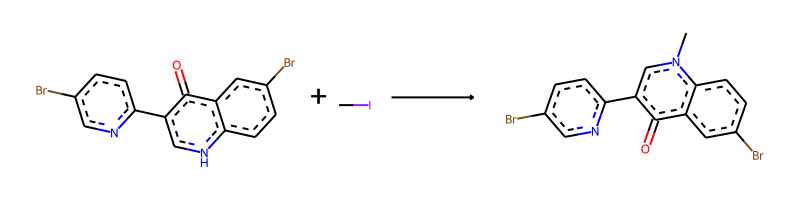

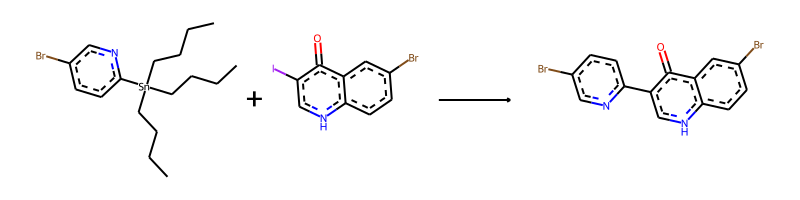

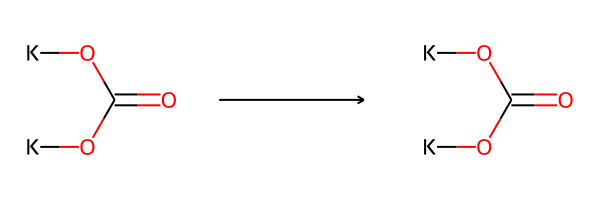

In [13]:
for index, path in enumerate(results['retrosynthetic_paths']):
    print('Showing path {} with confidence {}:'.format(index, path['confidence']))
    for reaction in collect_reactions(path):
        display(Chem.Draw.ReactionToImage(reaction))

保存以上图片，查看合成信心指数

In [14]:
#to save images
for index, path in enumerate(results['retrosynthetic_paths']):
	print('Showing path {} with confidence {}:'.format(index, path['confidence']))
	for i, reaction in enumerate(collect_reactions(path)):
		img = Chem.Draw.ReactionToImage(reaction)
		img.save(f"{index}-{i}.png")

Showing path 0 with confidence 0.91:
Showing path 1 with confidence 0.999:
Showing path 2 with confidence 0.999:
Showing path 3 with confidence 0.999:
Showing path 4 with confidence 0.999:
Showing path 5 with confidence 0.999:
Showing path 6 with confidence 1.0:
Showing path 7 with confidence 0.999:
Showing path 8 with confidence 0.999:
Showing path 9 with confidence 1.0:
Showing path 10 with confidence 1.0:
Showing path 11 with confidence 1.0:
Showing path 12 with confidence 1.0:
Showing path 13 with confidence 1.0:
Showing path 14 with confidence 1.0:
Showing path 15 with confidence 1.0:
Showing path 16 with confidence 0.999:
Showing path 17 with confidence 0.999:
Showing path 18 with confidence 1.0:
Showing path 19 with confidence 0.999:
Showing path 20 with confidence 1.0:
Showing path 21 with confidence 1.0:
Showing path 22 with confidence 0.91:
Showing path 23 with confidence 0.91:
Showing path 24 with confidence 0.91:
Showing path 25 with confidence 0.822:
Showing path 26 with c

请从左侧Files 下载合成路线图片，保存到本地
